# Road Sign Detection using CNN (GTSRB Dataset)

This project implements a Convolutional Neural Network (CNN) to detect and classify
road traffic signs using the German Traffic Sign Recognition Benchmark (GTSRB) dataset.

The system performs:
- Image preprocessing
- Multi-class classification (43 classes)
- Model training and evaluation
- Prediction on unseen images


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [41]:
dataset_path="/Users/arnav/Desktop/Se&Pm/dataset/archive (4)/Train"
classes=sorted(os.listdir(dataset_path),key=lambda x: int(x))

print("Number of classes: ", len(classes))
print("First 5 classes: ", classes[:5])

Number of classes:  43
First 5 classes:  ['0', '1', '2', '3', '4']


In [9]:
img_size = 64
x=[]
y=[]

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size, img_size))
        img=img/255.0
        x.append(img)
        y.append(int(cls))

In [10]:
x=np.array(x)
y=np.array(y)

print("Dataset shape: ", x.shape)
print("Dataset shape: ", y.shape)



Dataset shape:  (39209, 64, 64, 3)
Dataset shape:  (39209,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training Samples: ", x_train.shape[0])
print("Testing Samples: ", x_test.shape[0])

Training Samples:  31367
Testing Samples:  7842


In [12]:
num_classes = len(classes)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("y_train shape : ", y_train_cat.shape)
print("y_test shape : ", y_test_cat.shape)

y_train shape :  (31367, 43)
y_test shape :  (7842, 43)


In [13]:
class_weights=compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights=dict(enumerate(class_weights))
print("Sample Class Weights (first 5 :)")
for i in list(class_weights.keys())[:5]:
    print(f"Class {i}: {class_weights[i]:.3f}")

Sample Class Weights (first 5 :)
Class 0: 4.342
Class 1: 0.411
Class 2: 0.405
Class 3: 0.647
Class 4: 0.461


In [14]:
datagen=ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [15]:
class_names = {
    0:"Speed limit (20km/h)", 1:"Speed limit (30km/h)", 2:"Speed limit (50km/h)",
    3:"Speed limit (60km/h)", 4:"Speed limit (70km/h)", 5:"Speed limit (80km/h)",
    6:"End of speed limit (80km/h)", 7:"Speed limit (100km/h)", 8:"Speed limit (120km/h)",
    9:"No passing", 10:"No passing >3.5t", 11:"Right-of-way",
    12:"Priority road", 13:"Yield", 14:"Stop", 15:"No vehicles",
    16:"No vehicles >3.5t", 17:"No entry", 18:"General caution",
    19:"Dangerous curve left", 20:"Dangerous curve right",
    21:"Double curve", 22:"Bumpy road", 23:"Slippery road",
    24:"Road narrows", 25:"Road work", 26:"Traffic signals",
    27:"Pedestrians", 28:"Children crossing", 29:"Bicycles crossing",
    30:"Ice/snow", 31:"Wild animals", 32:"End limits",
    33:"Turn right", 34:"Turn left", 35:"Ahead only",
    36:"Straight or right", 37:"Straight or left",
    38:"Keep right", 39:"Keep left",
    40:"Roundabout", 41:"End no passing", 42:"End no passing >3.5t"
}


In [16]:
num_classes = len(classes)

model=Sequential([
    Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [17]:
model.compile(
    optimizer='adam',
      loss='categorical_crossentropy',
        metrics=['accuracy']
        )

In [18]:
epochs=30
BATCH_SIZE=64
history=model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=BATCH_SIZE),
    epochs=epochs,
    validation_data=(x_test, y_test_cat),
    class_weight=class_weights
)

Epoch 1/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.1989 - loss: 2.8087 - val_accuracy: 0.6209 - val_loss: 1.2538
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.5433 - loss: 1.3302 - val_accuracy: 0.8044 - val_loss: 0.6131
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.6884 - loss: 0.8073 - val_accuracy: 0.8914 - val_loss: 0.3436
Epoch 4/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.7679 - loss: 0.5701 - val_accuracy: 0.9292 - val_loss: 0.2262
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8153 - loss: 0.4422 - val_accuracy: 0.9505 - val_loss: 0.1557
Epoch 6/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8529 - loss: 0.3572 - val_accuracy: 0.9628 - val_loss: 0.1288
Epoch 7/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.8776 - loss: 0.2980 - val_accuracy: 0.9770 - val_loss: 0.0786
Epoch 8/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.8962 - loss: 0.2546 - 

In [19]:
test_loss , test_accuracy= model.evaluate(x_test, y_test_cat)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9969 - loss: 0.0097
Final Test Loss: 0.0097
Final Test Accuracy: 0.9969


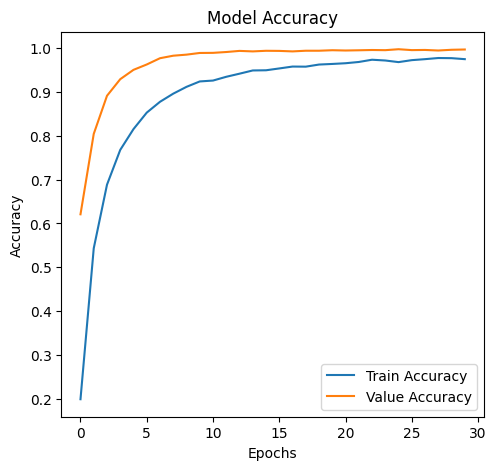

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Value Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


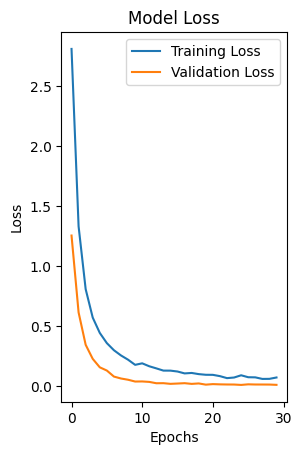

In [21]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


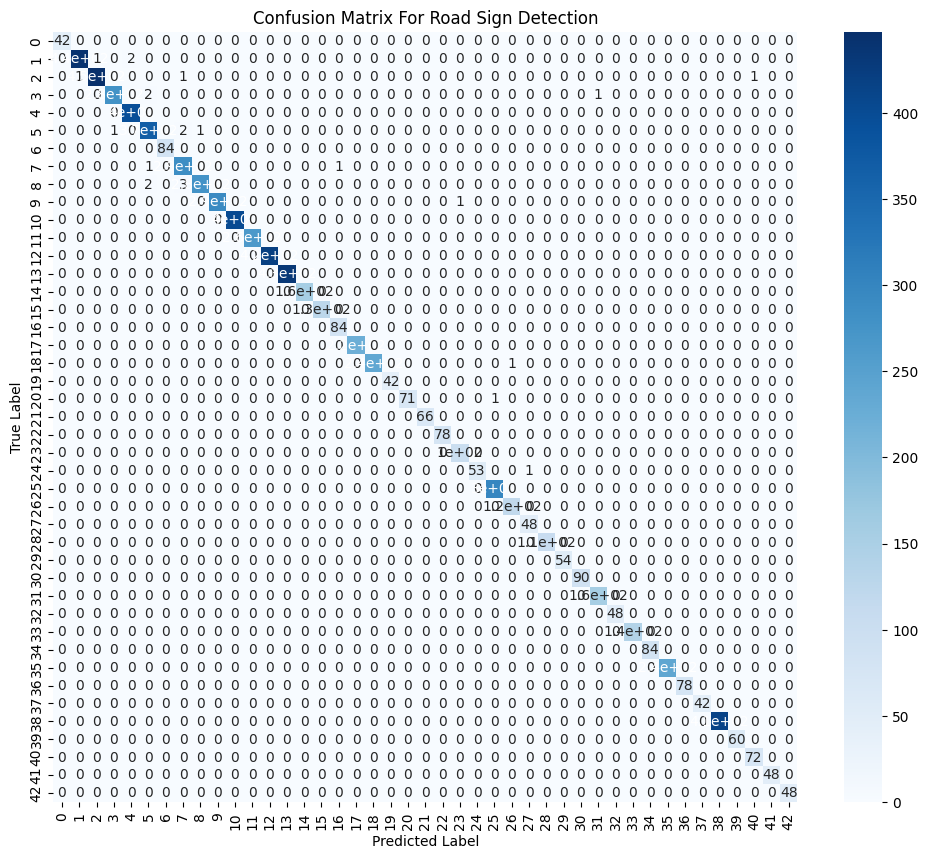

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test_cat, axis=1)

cm=confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm,cmap="Blues", annot=True, cbar=True )
plt.title("Confusion Matrix For Road Sign Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")    
plt.show()




## Conclusion

In this project, a Convolutional Neural Network (CNN) was successfully developed to
detect and classify road traffic signs using the German Traffic Sign Recognition
Benchmark (GTSRB) dataset.

The system involved structured preprocessing, data augmentation, and class balancing
to address real-world challenges such as class imbalance and visual variations in
traffic signs. The CNN architecture was carefully designed to extract spatial features
and perform multi-class classification across 43 traffic sign categories.

The trained model achieved a high test accuracy of **99.59%**, demonstrating strong
generalization on unseen data. The confusion matrix analysis further confirmed that the
model performs well across the majority of classes, with minimal misclassification
between visually similar signs.

This project demonstrates the effectiveness of deep learning techniques in intelligent
transportation systems and highlights the applicability of CNN-based approaches for
road sign detection in autonomous driving and driver assistance systems.

Future enhancements may include real-time detection using video input, deployment on
embedded systems, and integration with autonomous vehicle frameworks.


In [43]:
def test_single_image(img_path,top_k=5):
    img=cv2.imread(img_path)

    if img is None:
        print("Image not found : ",img_path)
        return
    
    img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized=cv2.resize(img_rgb, (img_size, img_size))
    img_resized=img_resized/255.0
    img_input=np.expand_dims(img_resized, axis=0)

    prediction=model.predict(img_input)[0]
    
    top_indices=prediction.argsort()[-top_k:][::-1]
    top_probs=prediction[top_indices]*100
    top_labels=[class_names[idx] for idx in top_indices]

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    predicted_class=np.argmax(prediction)
    confidence=prediction[predicted_class]*100
    class_name = class_names[predicted_class]
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class (Road Sign): {class_name} ({confidence:.2f}%)")
    plt.axis('off')

    print(f"Predicted Class Index: {predicted_class}")
    print(f"Predicted Class Name : {class_name}")
    print(f"Confidence: {confidence:.2f}%")

    plt.subplot(1,2,2)
    plt.barh(top_labels[::-1], top_probs[::-1], color='skyblue')
    plt.xlabel("Confidence (%)")
    plt.title("Top Predictions For The Image Uploaded")

    plt.tight_layout()
    plt.show()

    print("\nTop Predictions:")
    for label, prob in zip(top_labels, top_probs):
        print(f"{label}: {prob:.2f}%")



In [68]:
os.listdir("/Users/arnav/Desktop/Se&Pm/dataset/archive (4)/Train/14")[:5]


['00014_00017_00013.png',
 '00014_00006_00020.png',
 '00014_00017_00007.png',
 '00014_00006_00008.png',
 '00014_00024_00029.png']

In [69]:
import os
print(os.getcwd())


/Users/arnav/Desktop/Se&Pm/dataset/notebooks


In [104]:
import os

dataset_root = os.path.abspath(
    os.path.join(os.getcwd(), "..", "archive (4)")
)

print(dataset_root)


/Users/arnav/Desktop/Se&Pm/dataset/archive (4)


In [105]:
files = os.listdir(os.path.join(dataset_root, "Train", "14"))
print(files[:5])


['00014_00017_00013.png', '00014_00006_00020.png', '00014_00017_00007.png', '00014_00006_00008.png', '00014_00024_00029.png']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class Index: 8
Predicted Class Name : Speed limit (120km/h)
Confidence: 98.94%


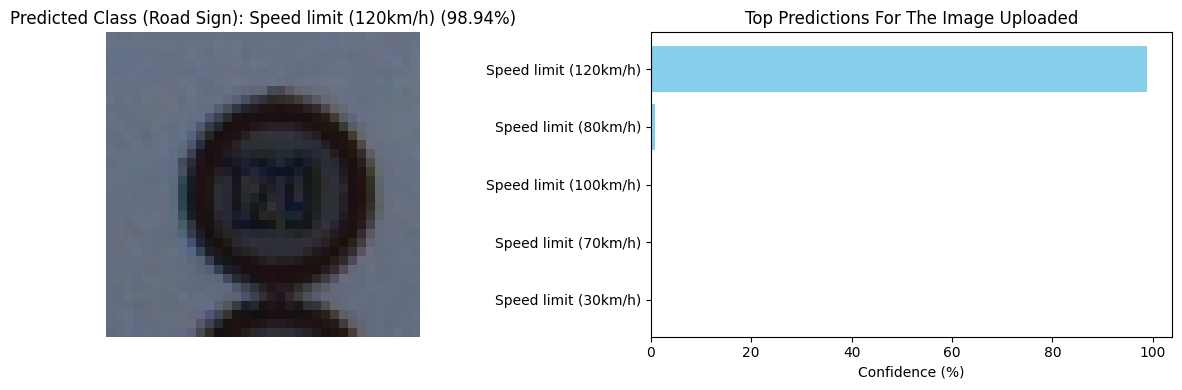


Top Predictions:
Speed limit (120km/h): 98.94%
Speed limit (80km/h): 0.84%
Speed limit (100km/h): 0.21%
Speed limit (70km/h): 0.00%
Speed limit (30km/h): 0.00%


In [106]:
img_path = os.path.join(dataset_root, "Test", test_images[0])
test_single_image(img_path)



Testing: 07488.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class Index: 8
Predicted Class Name : Speed limit (120km/h)
Confidence: 98.94%


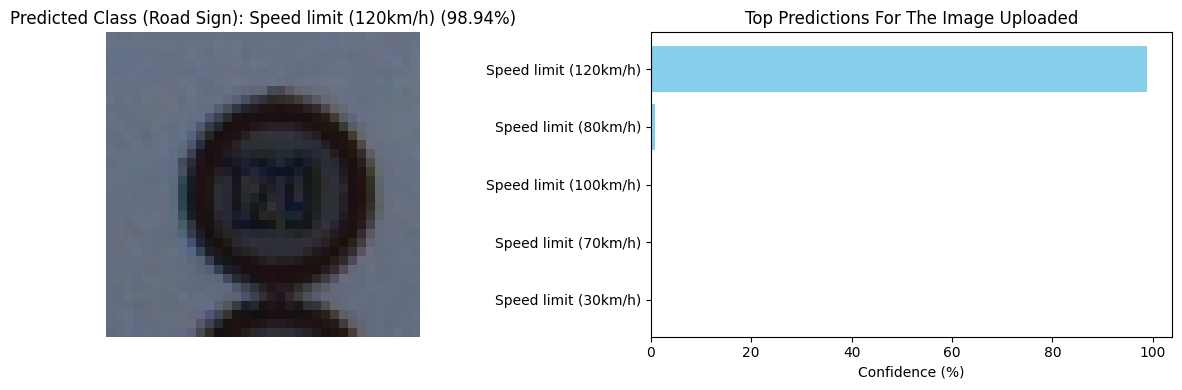


Top Predictions:
Speed limit (120km/h): 98.94%
Speed limit (80km/h): 0.84%
Speed limit (100km/h): 0.21%
Speed limit (70km/h): 0.00%
Speed limit (30km/h): 0.00%

Testing: 06796.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class Index: 14
Predicted Class Name : Stop
Confidence: 100.00%


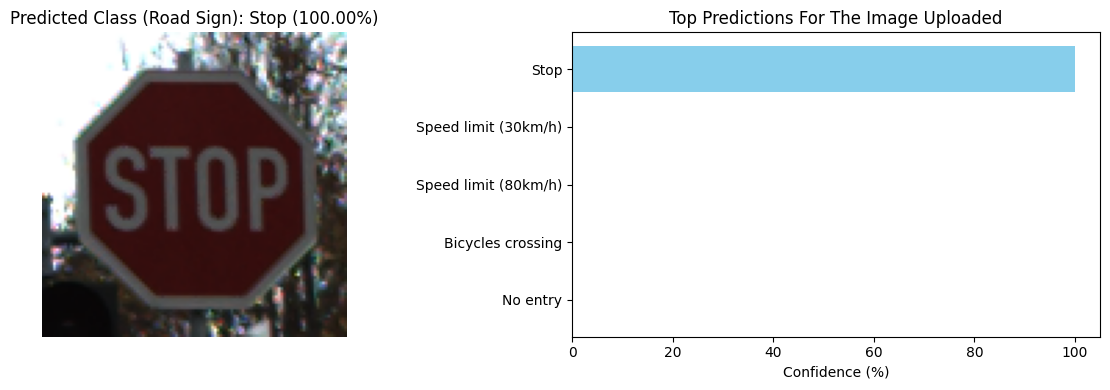


Top Predictions:
Stop: 100.00%
Speed limit (30km/h): 0.00%
Speed limit (80km/h): 0.00%
Bicycles crossing: 0.00%
No entry: 0.00%

Testing: 08963.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class Index: 2
Predicted Class Name : Speed limit (50km/h)
Confidence: 99.99%


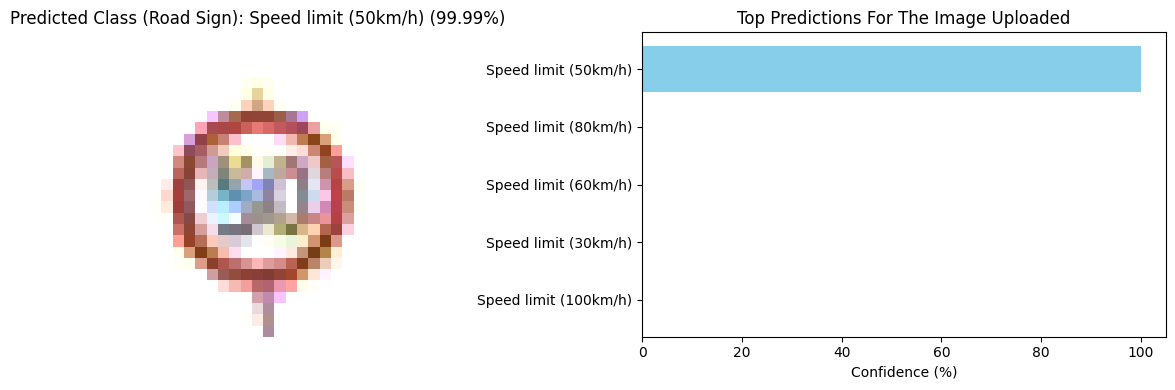


Top Predictions:
Speed limit (50km/h): 99.99%
Speed limit (80km/h): 0.01%
Speed limit (60km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (100km/h): 0.00%

Testing: 03836.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted Class Index: 1
Predicted Class Name : Speed limit (30km/h)
Confidence: 100.00%


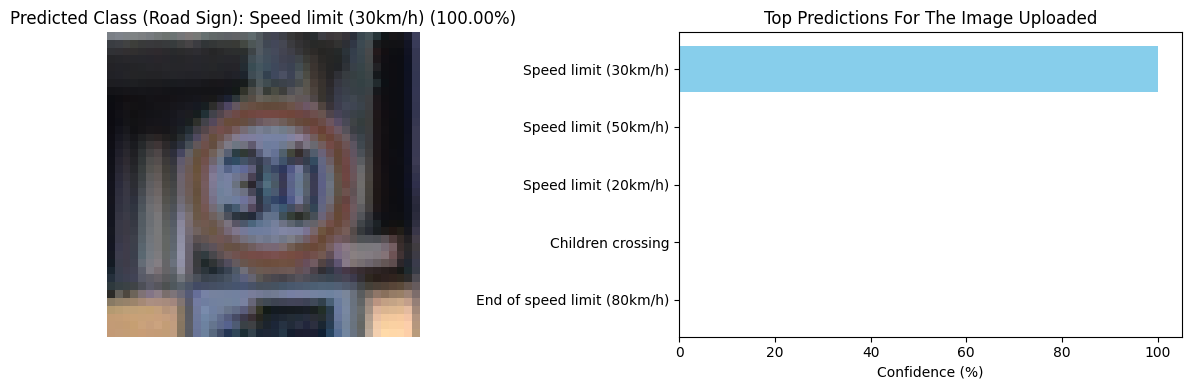


Top Predictions:
Speed limit (30km/h): 100.00%
Speed limit (50km/h): 0.00%
Speed limit (20km/h): 0.00%
Children crossing: 0.00%
End of speed limit (80km/h): 0.00%

Testing: 04181.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class Index: 8
Predicted Class Name : Speed limit (120km/h)
Confidence: 97.28%


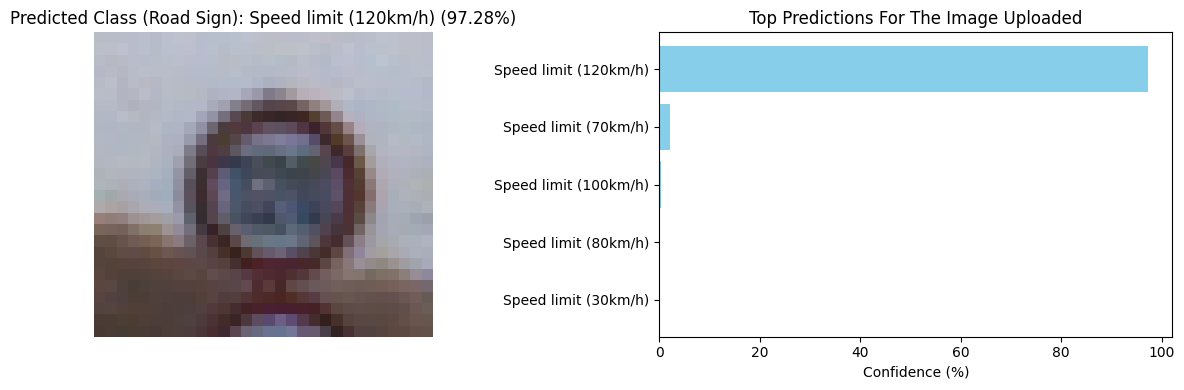


Top Predictions:
Speed limit (120km/h): 97.28%
Speed limit (70km/h): 2.14%
Speed limit (100km/h): 0.34%
Speed limit (80km/h): 0.24%
Speed limit (30km/h): 0.01%


In [107]:
for img_name in test_images[:5]:
    print("\nTesting:", img_name)
    test_single_image(os.path.join(dataset_root, "Test", img_name))


/Users/arnav/Desktop/Se&Pm/dataset/archive (4)/Test/07488.png
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Class Index: 8
Predicted Class Name : Speed limit (120km/h)
Confidence: 98.94%


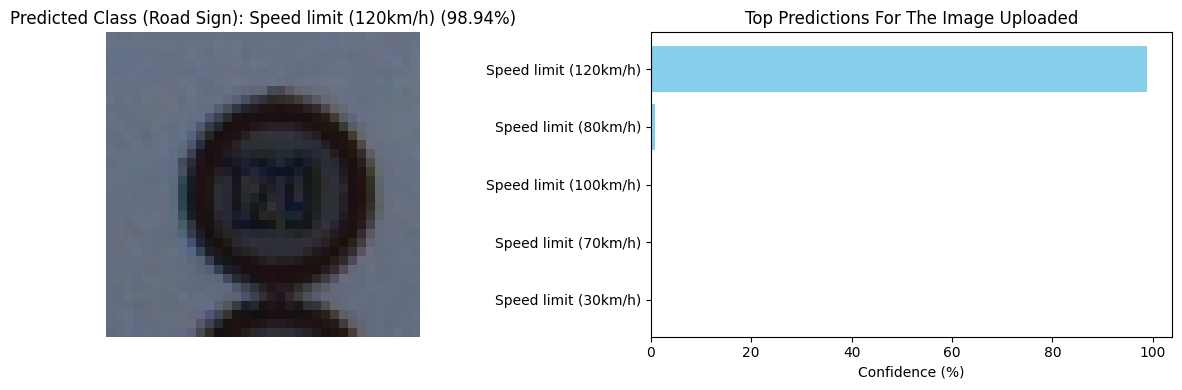


Top Predictions:
Speed limit (120km/h): 98.94%
Speed limit (80km/h): 0.84%
Speed limit (100km/h): 0.21%
Speed limit (70km/h): 0.00%
Speed limit (30km/h): 0.00%


In [110]:
img_path = os.path.join(dataset_root, "Test", test_images[0])
print(img_path)
print(os.path.exists(img_path))  # must be True

test_single_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class Index: 8
Predicted Class Name : Speed limit (120km/h)
Confidence: 98.94%


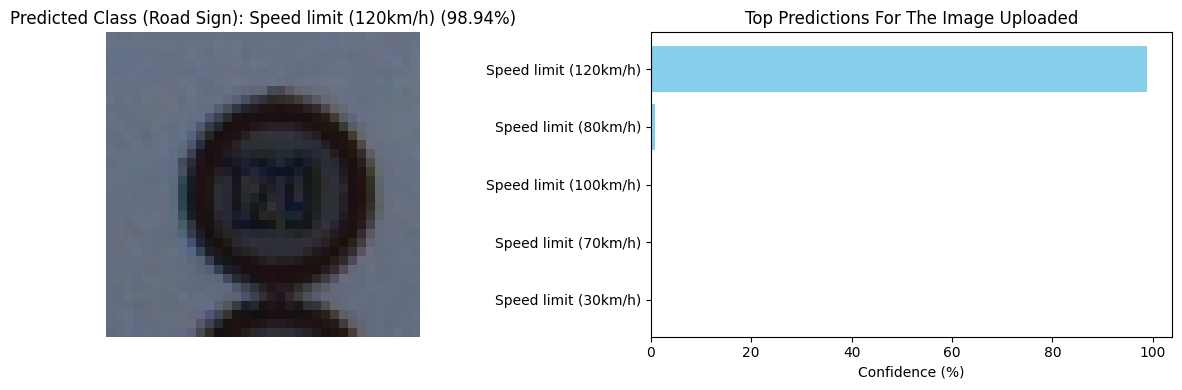


Top Predictions:
Speed limit (120km/h): 98.94%
Speed limit (80km/h): 0.84%
Speed limit (100km/h): 0.21%
Speed limit (70km/h): 0.00%
Speed limit (30km/h): 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Class Index: 14
Predicted Class Name : Stop
Confidence: 100.00%


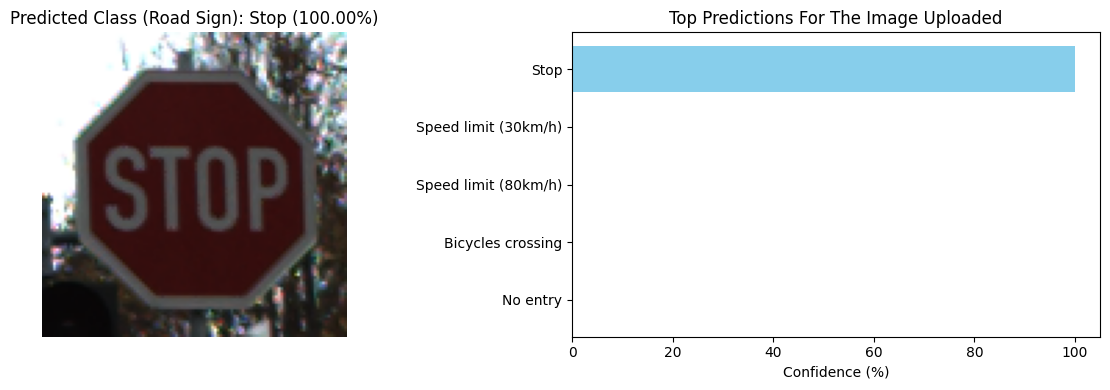


Top Predictions:
Stop: 100.00%
Speed limit (30km/h): 0.00%
Speed limit (80km/h): 0.00%
Bicycles crossing: 0.00%
No entry: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted Class Index: 2
Predicted Class Name : Speed limit (50km/h)
Confidence: 99.99%


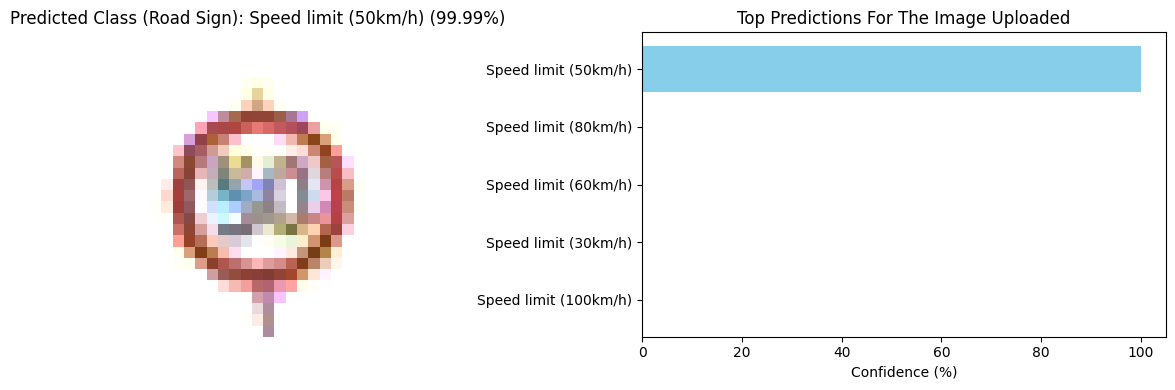


Top Predictions:
Speed limit (50km/h): 99.99%
Speed limit (80km/h): 0.01%
Speed limit (60km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (100km/h): 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted Class Index: 1
Predicted Class Name : Speed limit (30km/h)
Confidence: 100.00%


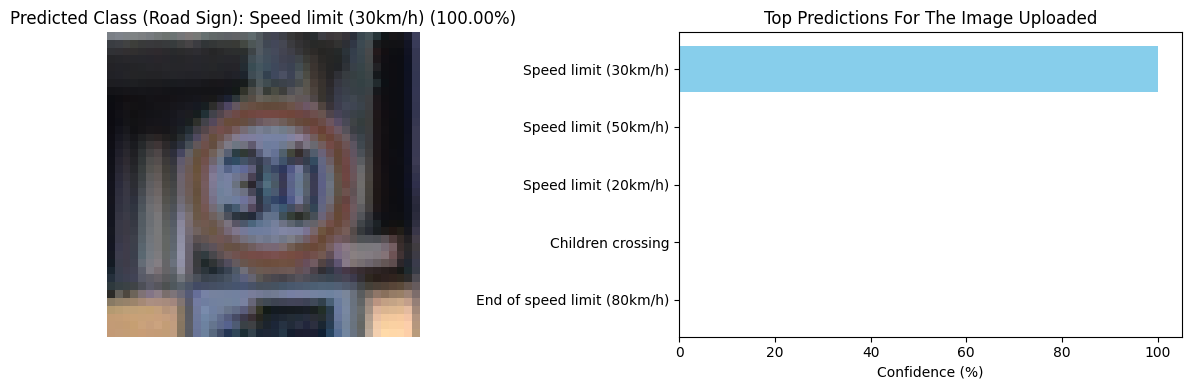


Top Predictions:
Speed limit (30km/h): 100.00%
Speed limit (50km/h): 0.00%
Speed limit (20km/h): 0.00%
Children crossing: 0.00%
End of speed limit (80km/h): 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Class Index: 8
Predicted Class Name : Speed limit (120km/h)
Confidence: 97.28%


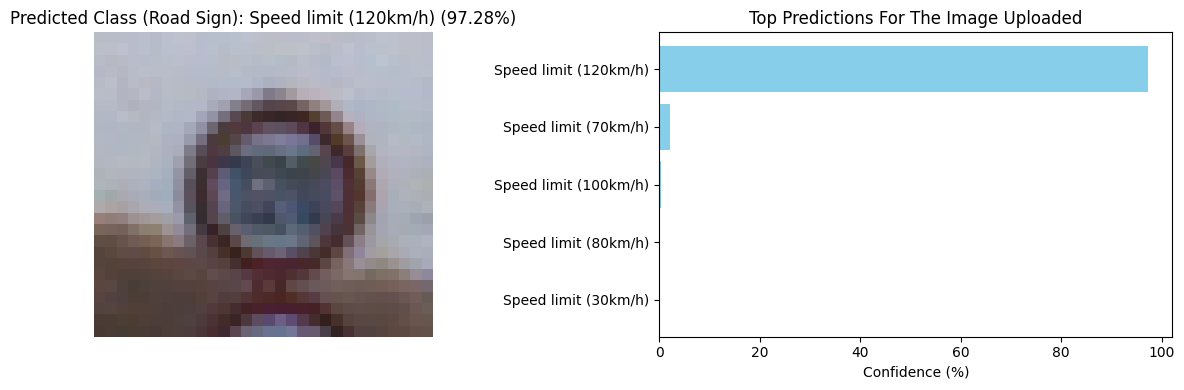


Top Predictions:
Speed limit (120km/h): 97.28%
Speed limit (70km/h): 2.14%
Speed limit (100km/h): 0.34%
Speed limit (80km/h): 0.24%
Speed limit (30km/h): 0.01%


In [111]:
for img_name in test_images[:5]:
    img_path = os.path.join(dataset_root, "Test", img_name)
    test_single_image(img_path)


In [112]:
import os

os.makedirs("../backend",exist_ok=True)

model.save("../backend/road_sign_model.keras")

print("Model Save Successful!")

Model Save Successful!
